### Load datasets

In [1]:
from data.data_preparation import get_model_df, get_users_df, get_items_df, get_categories
from model.model import RecommenderSystemModel
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df_interactions = get_model_df(dummy=True)

Loading data...
Dummy data read


In [3]:
df_interactions.head()

,user_id,book_id,is_read,rating,is_reviewed,non_fiction,fantasy,mystery,young_adult,graphic,...,paranormal,romance,history,biography,historical_fiction,comics,poetry,crime,children,fiction
index,,,,,,,,,,,,,,,,,,,,,
0,2413,14859,1,1.0,0,0,0,699,0,0,...,0,0,0,0,0,0,0,699,0,287
1,2413,14839,1,1.0,0,0,0,699,0,0,...,0,0,0,0,0,0,0,699,0,287
2,2413,1044,1,1.0,0,11,0,0,0,0,...,0,1,16,16,16,0,0,0,0,0
3,2413,7323,1,1.0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2413,7432,1,1.0,0,0,0,1326,0,0,...,0,0,703,703,703,0,0,1326,0,698


In [3]:
df_items = get_items_df(df_interactions)

Getting items dataframe...


In [5]:
df_items.head(5)

,is_read,rating,is_reviewed,vector,priority
book_id,,,,,
2,0,0.000000,0,"[[8249.0, 0.0, 451.0, 3157.0, 0.0, 451.0, 8249...",0
3,0,0.000000,0,"[[54156.0, 0.0, 668.0, 17058.0, 0.0, 668.0, 54...",0
5,0,0.000000,0,"[[4639.0, 0.0, 537.0, 1513.0, 0.0, 537.0, 4639...",0
7,0,0.000000,0,"[[295.0, 0.0, 3.0, 94.0, 0.0, 3.0, 295.0, 0.0,...",0
10,1,0.142857,1,"[[295.0, 0.0, 3.0, 94.0, 0.0, 3.0, 295.0, 0.0,...",0


In [4]:
df_users = get_users_df(df_interactions, df_items)

Getting users dataframe...


In [5]:
df_users.head()

,is_reviewed,is_read,rating,book_id,vector
user_id,,,,,
2413,0.000000,114,0.823077,"{14859: 0.3099118836633818, 14839: 0.309911883...","[[34, 61, 25, 21, 9, 25, 34, 24, 66, 66, 66, 9..."
4856,0.000000,277,0.497003,"{1000: 0.3833610296025904, 66: 0.8355593997339...","[[109, 177, 90, 74, 50, 90, 109, 69, 200, 200,..."
16557,0.000000,87,0.449730,"{7433: 0.6174210974173361, 1001: 0.30633599935...","[[70, 74, 45, 52, 21, 45, 70, 30, 92, 92, 92, ..."
18936,0.041531,92,0.052563,"{6418: 0.23855851228023925, 6419: 0.3260143452...","[[384, 704, 345, 275, 160, 345, 384, 305, 775,..."
20075,0.119626,178,0.244112,"{87562: 0.3301209163883265, 51358: 0.813092850...","[[138, 238, 124, 110, 47, 124, 138, 118, 292, ..."


array([[<Axes: title={'center': 'fantasy'}>,
        <Axes: title={'center': 'non_fiction'}>,
        <Axes: title={'center': 'mystery'}>,
        <Axes: title={'center': 'young_adult'}>],
       [<Axes: title={'center': 'graphic'}>,
        <Axes: title={'center': 'thriller'}>,
        <Axes: title={'center': 'paranormal'}>,
        <Axes: title={'center': 'romance'}>],
       [<Axes: title={'center': 'history'}>,
        <Axes: title={'center': 'biography'}>,
        <Axes: title={'center': 'historical_fiction'}>,
        <Axes: title={'center': 'comics'}>],
       [<Axes: title={'center': 'poetry'}>,
        <Axes: title={'center': 'crime'}>,
        <Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'fiction'}>]], dtype=object)

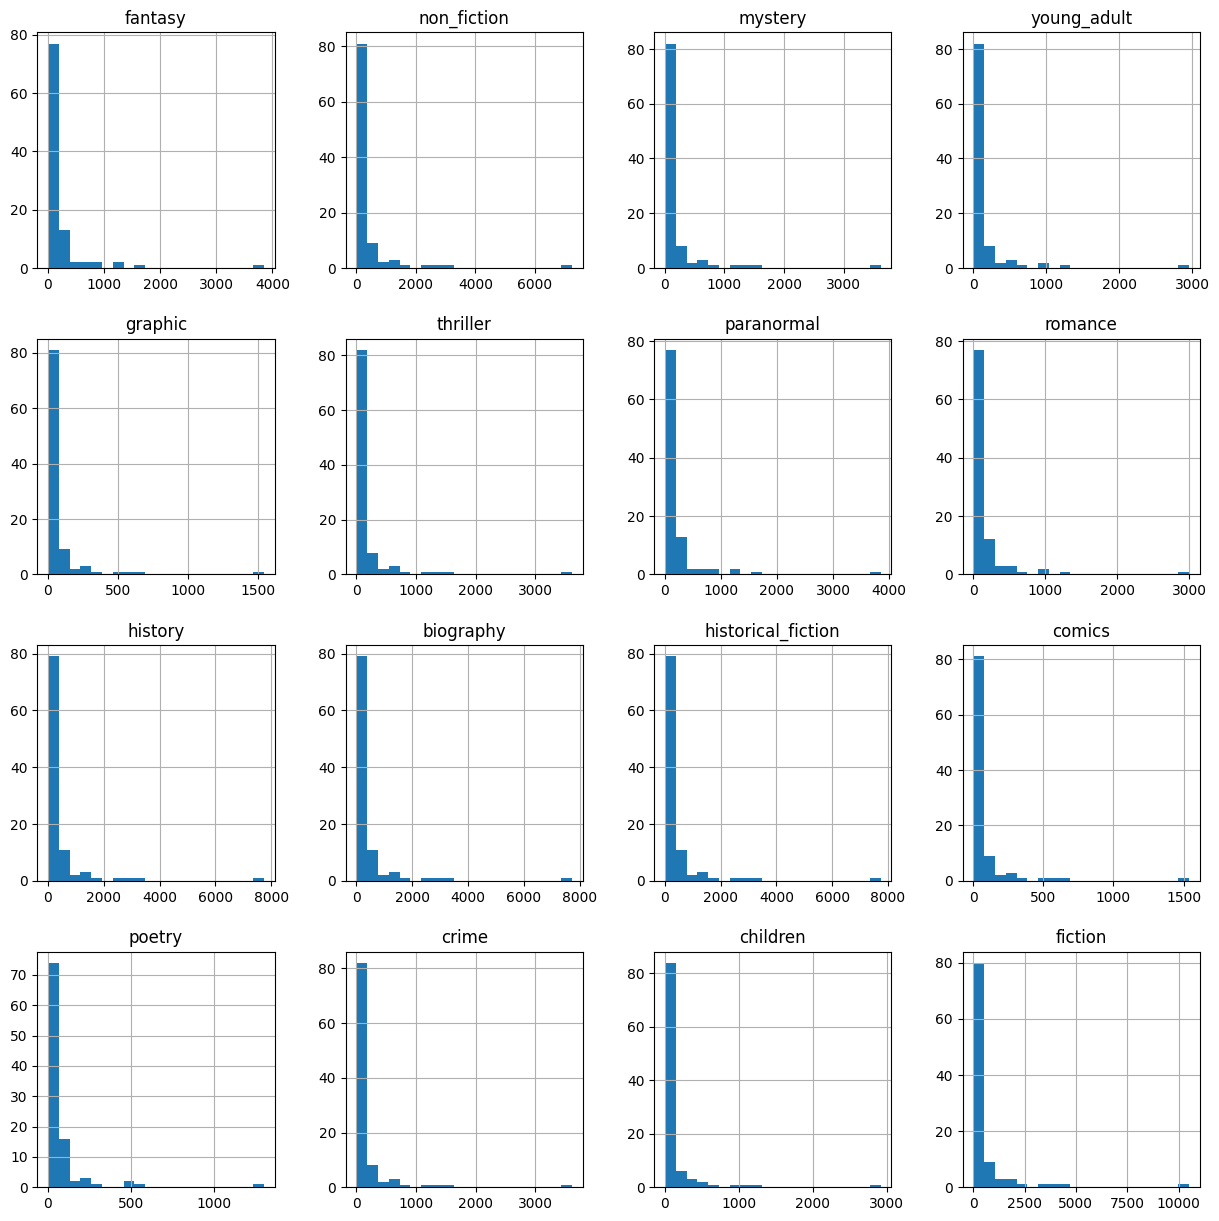

In [8]:
cat_cols = get_categories()
df_users[cat_cols].hist(bins=20, figsize=(15, 15))

In [2]:
rec_sys = RecommenderSystemModel(n_users=100, dummy=True)

Initializing model...

Loading data...
Dummy data read
Model dataframe ready. Interactions: 80167
Getting items dataframe...


/Users/javierus/Documents/Delft/Master Thesis/master_thesis/venv/lib/python3.12/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Items dataframe ready. Items: 45564
Getting users dataframe...
Users dataframe ready. Users: 100
Creating user agents...
Users added.
Creating item agents...
Items added.
Finished model initialization.


In [3]:
rec_sys.run_model()

Step 1 executed.
Step 2 executed.
Step 3 executed.
Step 4 executed.
Step 5 executed.
Step 6 executed.
Step 7 executed.
Step 8 executed.
Step 9 executed.
Step 10 executed.


In [4]:
d = rec_sys.datacollector.get_agent_vars_dataframe()

In [5]:
d.dropna(inplace=True)

In [6]:
d["vector"] = d["vector"].apply(lambda x: x[0])
expanded_df = d["vector"].apply(pd.Series)

In [7]:
odf = expanded_df.xs(34, level=1)
odf.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Step,,,,,,,,,,,,,,,,
1,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
2,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
3,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
4,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
5,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
6,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
7,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
8,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
9,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036


In [11]:
odf[odf.index == 34]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
AgentID,,,,,,,,,,,,,,,,
34,794,1334,715,585,323,715,794,559,1443,1443,1443,323,225,715,536,2038


In [23]:
from model.agents import UserAgent

agents = [a for a in rec_sys.schedule.agents if isinstance(a, UserAgent)]
agent = agents[35]

In [10]:
d.head(150)

vector
Step AgentID                                                   
1    50       [129, 295, 126, 99, 50, 126, 129, 100, 285, 28...
     8        [220, 406, 192, 164, 90, 192, 220, 153, 448, 4...
     55       [101, 164, 76, 74, 41, 76, 101, 89, 205, 205, ...
     48       [321, 584, 283, 244, 106, 283, 321, 251, 669, ...
     60       [105, 141, 74, 72, 48, 74, 105, 67, 156, 156, ...
...                                                         ...
2    3        [70, 77, 45, 52, 21, 45, 70, 30, 95, 95, 95, 2...
     40       [93, 162, 82, 66, 43, 82, 93, 66, 195, 195, 19...
     70       [1272, 2404, 1142, 936, 508, 1142, 1272, 1017,...
     21       [33, 49, 26, 10, 12, 26, 33, 26, 48, 48, 48, 1...
     1        [34, 62, 25, 21, 10, 25, 34, 24, 67, 67, 67, 1...

[150 rows x 1 columns]